In [4]:
import os
import pandas as pd
import numpy as np

# --- Configuration ---
# Update this path to your final embedding dataset on your local machine
DATA_DIR = "data"
FINAL_EMBEDDING_CSV = os.path.join(DATA_DIR, "final_dataset_with_embeddings.csv")

# --- Load Data ---
print(f"Loading data from '{FINAL_EMBEDDING_CSV}'...")
df = pd.read_csv(FINAL_EMBEDDING_CSV)

# Separate the data into features (X), labels (y), and metadata
embedding_cols = [col for col in df.columns if col.startswith('emb_')]
X = df[embedding_cols].values
y = df['is_bug_introducing'].values
metadata_df = df.drop(columns=embedding_cols + ['is_bug_introducing'])

print(f"Data loaded successfully. Found {X.shape[0]} samples with {X.shape[1]} embedding dimensions.")

Loading data from 'data\final_dataset_with_embeddings.csv'...
Data loaded successfully. Found 12595 samples with 768 embedding dimensions.


In [5]:
from sklearn.preprocessing import Normalizer

print("Normalizing embedding vectors...")
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)

print("Vectors normalized successfully.")

Normalizing embedding vectors...
Vectors normalized successfully.


In [8]:
import umap
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# We assume you still have X_normalized and y from the previous steps

# 1. Define the pipeline
# The process is to first apply UMAP, then train a k-NN classifier on its output.
pipeline = Pipeline([
    ('umap', umap.UMAP(n_components=2, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7)) # A simple k-NN classifier
])

# 2. Define the parameter grid to search over
# The format is 'step_name__parameter_name'
param_grid = {
    'umap__n_neighbors': [5, 15, 30, 50],
    'umap__min_dist': [0.0, 0.1, 0.25, 0.5]
}

# 3. Set up and run the GridSearchCV
# We'll use 'f1_weighted' as our score because the dataset is imbalanced.
# cv=3 means 3-fold cross-validation.
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=3, 
    scoring='f1_weighted',
    verbose=2 # This will show you the progress
)

print("Starting grid search... This will take a significant amount of time.")
grid_search.fit(X_normalized, y)

# 4. Print the best results
print("\n--- Grid Search Complete --- ✅")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")
print("Best UMAP Parameters:")
print(grid_search.best_params_)

Starting grid search... This will take a significant amount of time.
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.0, umap__n_neighbors=5; total time=  35.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.0, umap__n_neighbors=5; total time=  12.0s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.0, umap__n_neighbors=5; total time=  15.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=15; total time=  21.0s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=15; total time=  23.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=15; total time=  22.1s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=30; total time=  28.7s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=30; total time=  35.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=30; total time=  34.3s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=50; total time=  45.1s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=50; total time=  35.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.0, umap__n_neighbors=50; total time=  34.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.1, umap__n_neighbors=5; total time=  15.6s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.1, umap__n_neighbors=5; total time=  17.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.1, umap__n_neighbors=5; total time=  17.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=15; total time=  22.7s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=15; total time=  20.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=15; total time=  18.9s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=30; total time=  27.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=30; total time=  26.3s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=30; total time=  25.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=50; total time=  37.9s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=50; total time=  54.0s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.1, umap__n_neighbors=50; total time=  41.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.25, umap__n_neighbors=5; total time=  14.7s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.25, umap__n_neighbors=5; total time=  11.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.25, umap__n_neighbors=5; total time=  19.0s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=15; total time=  19.1s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=15; total time=  19.8s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=15; total time=  19.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=30; total time=  33.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=30; total time=  39.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=30; total time=  43.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=50; total time=  50.3s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=50; total time=  49.0s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ..........umap__min_dist=0.25, umap__n_neighbors=50; total time=  48.8s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.5, umap__n_neighbors=5; total time=  23.5s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.5, umap__n_neighbors=5; total time=  20.8s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ............umap__min_dist=0.5, umap__n_neighbors=5; total time=  23.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=15; total time=  34.4s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=15; total time=  34.6s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=15; total time=  33.8s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=30; total time=  44.1s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=30; total time=  40.3s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=30; total time=  42.2s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=50; total time=  56.7s


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=50; total time= 1.1min


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[CV] END ...........umap__min_dist=0.5, umap__n_neighbors=50; total time= 1.2min


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



--- Grid Search Complete --- ✅
Best F1 Score: 0.5971
Best UMAP Parameters:
{'umap__min_dist': 0.5, 'umap__n_neighbors': 50}


Performing UMAP to reduce dimensions to 2... (This may take a few moments)


c:\Users\pradishan\code\wso2-AI-Tool\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP complete. Here are the first few rows of the new DataFrame:


,umap_1,umap_2,is_bug,commit_hash
0,1.333210,-0.397517,1,e620a8b1cd55f8caddd293b9b9547aba32d78a7b
1,1.541601,-1.055308,0,ead4427d98ed9589d13c49912707465f7788a736
2,2.656601,3.364798,1,966fad564f08911b4eb145e2d7a049c9f40aed74
3,9.071639,-1.191304,0,f65e79949d8f6e2316a60b20a126ece88f6ce3cb
4,5.793186,1.911236,1,ec0ad0baca52b88c77d7d63760b6e82f4b0a8fd3



Visualizing UMAP results...


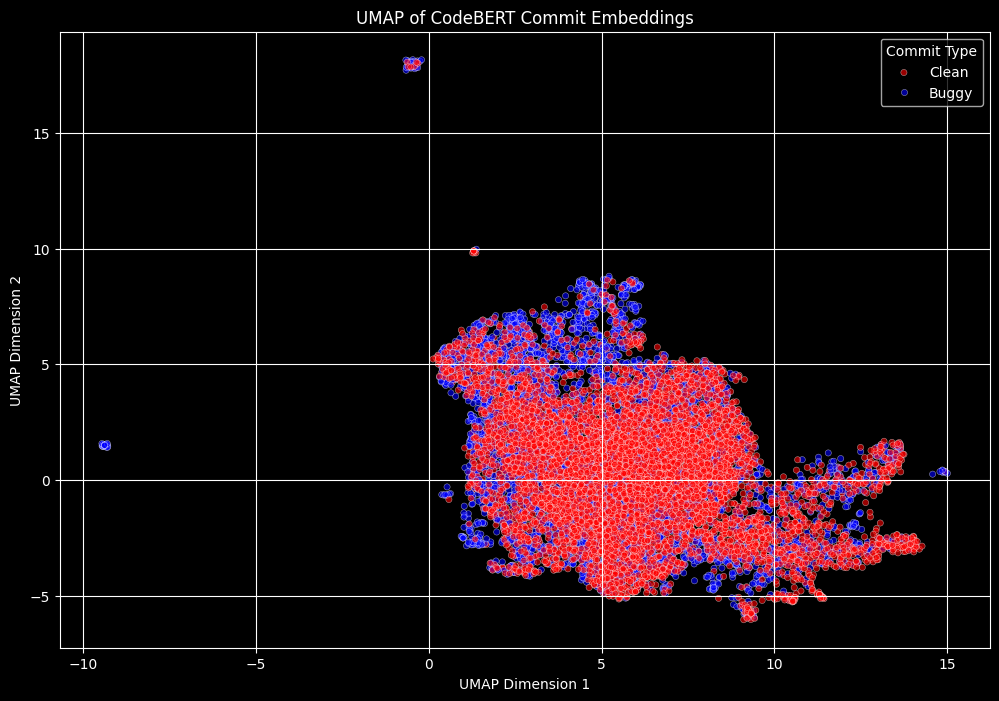

In [9]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We assume you still have the X_normalized, y, and metadata_df variables from the previous steps

print("Performing UMAP to reduce dimensions to 2... (This may take a few moments)")
# --- Run the UMAP algorithm ---
reducer = umap.UMAP(
    n_components=2, 
    n_neighbors=50,
    min_dist=0.5,
    random_state=42
)
X_umap = reducer.fit_transform(X_normalized)

# --- Create a new DataFrame for visualization ---
df_umap = pd.DataFrame(X_umap, columns=['umap_1', 'umap_2'])
df_umap['is_bug'] = y # Add the labels for coloring
df_umap['commit_hash'] = metadata_df['commit_hash']

print("UMAP complete. Here are the first few rows of the new DataFrame:")
display(df_umap.head())


# --- Visualize the UMAP results ---
print("\nVisualizing UMAP results...")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='umap_1',
    y='umap_2',
    hue='is_bug',
    data=df_umap,
    alpha=0.6,
    s=20,  # Adjust point size
    palette={0: 'blue', 1: 'red'},
)

plt.title('UMAP of CodeBERT Commit Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Commit Type', labels=['Clean', 'Buggy'])
plt.grid(True)
plt.show()